<a href="https://colab.research.google.com/github/larin92/ML_zoomcamp/blob/main/04-evaluation/04-homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

### Data preparation

In this homework, we will use the Car price [dataset](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv) from previous module.

We'll work with the `MSRP` (manufacturer suggested retail price) variable, and we'll transform it to a classification task.

`MSRP` is targer var, we will store targets in `price` var later though, and use binary representation of `price` being above or below mean in `above_average` var

In [2]:
# !command style for colab use
# !wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

df_raw = pd.read_csv('../03-classification/car_pricing.csv')
price = None

In [3]:
df_raw.describe(include=["O"])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


In [4]:
print(df_raw.head())
print("\nshape: ", df_raw.shape)

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [5]:
selected_columns = ['MSRP', 'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 
                    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg']
df_filtered = df_raw[selected_columns]
df_filtered.columns = df_filtered.columns.str.replace(' ', '_').str.lower()
df_filtered.fillna(0, inplace=True)
df_filtered.rename(columns={'msrp': 'price'}, inplace=True)
price = df_filtered.pop('price')
df_filtered.head()

C:\Users\larki\AppData\Local\Temp\ipykernel_20060\2779128555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)
C:\Users\larki\AppData\Local\Temp\ipykernel_20060\2779128555.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'msrp': 'price'}, inplace=True)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18


### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `1`.
* Make sure that the target value (`price`) is not in your dataframe.

In [6]:
from dataclasses import dataclass
from sklearn.model_selection import train_test_split

@dataclass
class Split:
    X_train: pd.DataFrame
    X_val: pd.DataFrame
    X_test: pd.DataFrame
    y_train: pd.DataFrame
    y_val: pd.DataFrame
    y_test: pd.DataFrame

def train_val_test_split(df: pd.DataFrame, target, frac=[0.6, 0.2, 0.2], seed=1):
    train_size = frac[0]
    test_size = frac[2]
    relative_val_size = frac[1] / (train_size + test_size)
    
    # sklearn's split is not convenient, pandas sample() is more convenient
    X_train, X_test, y_train, y_test \
        = train_test_split(df, target, test_size=test_size, random_state=seed)
    
    X_train, X_val, y_train, y_val \
        = train_test_split(X_train, y_train, test_size=relative_val_size, random_state=seed)
    
    X_train.reset_index(drop=True, inplace=True)
    X_val.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)

    return Split(X_train, X_val, X_test, y_train, y_val, y_test)

above_average = (price > price.mean()).astype('int')
above_average.name = 'above_average'

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `engine_hp`
- `engine_cylinders`
- `highway_mpg`
- `city_mpg`

In [7]:
from sklearn.metrics import roc_auc_score

split = train_val_test_split(df_filtered, above_average)
features = split.X_train.select_dtypes(include=['number'])
scores = {}
for feature in features:
    scores[feature] = roc_auc_score(split.y_train, split.X_train[feature])
    if scores[feature] < 0.5:
        scores[feature] = roc_auc_score(split.y_train, -split.X_train[feature])

scores

{'year': 0.687551492804683,
 'engine_hp': 0.9171031265539011,
 'engine_cylinders': 0.766116490165669,
 'highway_mpg': 0.6330587871772013,
 'city_mpg': 0.6734244643245233}

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

In [8]:
import sklearn.linear_model as sklin
from sklearn.feature_extraction import DictVectorizer

def fit_and_predict(X_train: pd.DataFrame, X_val: pd.DataFrame, Y_train: pd.DataFrame, C=1.):
    dv = DictVectorizer()
    X_train = dv.fit_transform(X_train.to_dict(orient='records'))
    X_val = dv.transform(X_val.to_dict(orient='records'))
    model = sklin.LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=1)
    model.fit(X_train, Y_train)
    y_val_pred_probas = model.predict_proba(X_val)[:, 1]
    
    return y_val_pred_probas

split = train_val_test_split(df_filtered, above_average)
y_val_pred_probas = fit_and_predict(split.X_train, split.X_val, split.y_train)
print("ROC AUC score:", roc_auc_score(split.y_val, y_val_pred_probas))

ROC AUC score: 0.9790336815928319


### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

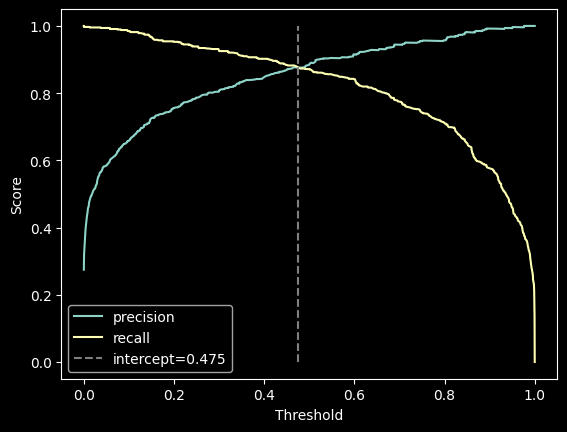

In [9]:
from sklearn.metrics import precision_recall_curve

# thresholds = np.arange(0, 1.01, 0.01)
prc = precision_recall_curve(split.y_val, y_val_pred_probas)
plt.style.use('dark_background')

df_prc = pd.DataFrame({'precision': prc[0], 'recall': prc[1]}, index=np.append(prc[2], 1.))
ax = df_prc.plot(y=['precision', 'recall'], xlabel='Threshold', ylabel='Score')
intercept = (df_prc['precision'] - df_prc['recall']).abs().idxmin()
ax.vlines(
    intercept,
    ymin=0, ymax=1, linestyles='dashed', colors='grey',
    label=f'intercept={intercept.round(3)}'
)
ax.legend()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [10]:
df_prc = pd.DataFrame({'precision': prc[0], 'recall': prc[1]}, index=np.append(prc[2], 1.))
intercept = (df_prc['precision'] - df_prc['recall']).abs().idxmin()

df_prc['f1'] = 2 * df_prc['precision'] * df_prc['recall'] / (df_prc['precision'] + df_prc['recall'])
print(f"F1 score is maximal ({df_prc['f1'].max()}) at {df_prc['f1'].idxmax()} threshold.")

F1 score is maximal (0.8810641627543037) at 0.5273998965519843 threshold.


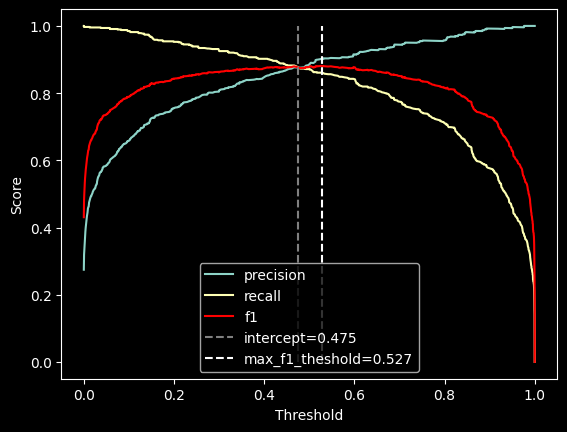

In [11]:
max_f1_theshold = df_prc['f1'].idxmax()
ax = df_prc.plot(y=['precision', 'recall'], xlabel='Threshold', ylabel='Score')
ax = df_prc.plot(ax=ax, y='f1', label='f1', color='red')
ax.vlines(
    intercept,
    ymin=0, ymax=1, linestyles='dashed', colors='grey',
    label=f'intercept={intercept.round(3)}'
)
ax.vlines(
    max_f1_theshold,
    ymin=0, ymax=1, linestyles='dashed', colors='white',
    label=f'max_f1_theshold={max_f1_theshold.round(3)}'
)

ax.legend()

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

In [12]:
from sklearn.model_selection import KFold

split = train_val_test_split(df_filtered, above_average)
x_train_full = pd.concat([split.X_train, split.X_val])
y_train_full = pd.concat([split.y_train, split.y_val])

def kfold_eval(x_train_full: pd.DataFrame, y_train_full: pd.DataFrame, C=1.):
	kfold = KFold(n_splits=5, shuffle=True, random_state=1)
	scores = []
	for train_idx, val_idx in kfold.split(x_train_full):
		x_train_fold = x_train_full.iloc[train_idx]
		x_val_fold = x_train_full.iloc[val_idx]
		y_train_fold = y_train_full.iloc[train_idx]
		y_val_true_fold = y_train_full.iloc[val_idx]
		
		y_val_pred_probas = fit_and_predict(x_train_fold, x_val_fold, y_train_fold, C=C)
		scores += [roc_auc_score(y_val_true_fold, y_val_pred_probas)]

	print(np.mean(scores), "+-", np.std(scores))

kfold_eval(x_train_full, y_train_full)

0.9787882814003179 +- 0.001277534822830899


### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?
> If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [13]:
for C in [0.01, 0.1, 0.5, 10]:
    kfold_eval(x_train_full, y_train_full, C)

0.9516315076683484 +- 0.0038772172484415647
0.9714664144657649 +- 0.0034970182696948044
0.976761645345877 +- 0.0019698733386786025
0.9816037819474224 +- 0.0020320432219773994
